In [1]:
from SEBlock import SE_Block
import torch.nn.functional as F
from torch import nn
import torch
from torch.optim import Adam
import torchvision
import math
from imagenette_ds import load_imagenette
from model_learning import Training_valid_testing_model
from EfficientBlock import EfficientNet

In [2]:
train_loader, val_loader, test_loader, test_dataset = load_imagenette()

In [3]:
%load_ext autoreload
%env CUDA_VISIBLE_DEVICES = '3'

env: CUDA_VISIBLE_DEVICES='3'


In [4]:
device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')

In [5]:
# b0 version by default, but it can be changed by varying w_factor and d_factor
model = EfficientNet()
model = model.to(device)
num_epochs = 15
learning_rate = 0.001
loss_function = nn.CrossEntropyLoss()
optimizer = Adam(params=model.parameters(), lr=learning_rate)

In [6]:
# In pytorch - EfficientNet B0 parameters: 5288548
print('parameters:', sum(param.numel() for param in model.parameters()))

parameters: 4020358


In [7]:
learning = Training_valid_testing_model(model=model, loss_function=loss_function,
                                        optimizer=optimizer, num_epochs=num_epochs, train_loader=train_loader,
                                        val_loader=val_loader, test_loader=test_loader, test_dataset=test_dataset,
                                        device=device)

In [8]:
learning.launch_epochs_calculations()

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch number is 1


  7%|▋         | 1/15 [03:05<43:18, 185.63s/it]

CrossEntropyLoss train 2.0031154691367536
CrossEntropyLoss validation 1.8260750464402913
Validation accuracy: 37.675213675213676
Epoch number is 2


 13%|█▎        | 2/15 [06:28<42:24, 195.72s/it]

CrossEntropyLoss train 1.749422466432726
CrossEntropyLoss validation 1.6041136081101464
Validation accuracy: 43.863247863247864
Epoch number is 3


 20%|██        | 3/15 [09:53<39:59, 199.92s/it]

CrossEntropyLoss train 1.587638956570142
CrossEntropyLoss validation 1.3535920570456916
Validation accuracy: 55.042735042735046
Epoch number is 4


 27%|██▋       | 4/15 [13:30<37:55, 206.84s/it]

CrossEntropyLoss train 1.4120568435739826
CrossEntropyLoss validation 1.338908041598367
Validation accuracy: 56.17094017094017
Epoch number is 5


 33%|███▎      | 5/15 [16:56<34:24, 206.40s/it]

CrossEntropyLoss train 1.2831682817557373
CrossEntropyLoss validation 1.0994109975509956
Validation accuracy: 63.965811965811966
Epoch number is 6


 40%|████      | 6/15 [20:35<31:37, 210.81s/it]

CrossEntropyLoss train 1.1820384553960852
CrossEntropyLoss validation 1.078073341338361
Validation accuracy: 65.12820512820512
Epoch number is 7


 47%|████▋     | 7/15 [24:19<28:39, 214.90s/it]

CrossEntropyLoss train 1.0915179799336034
CrossEntropyLoss validation 0.9953163854085683
Validation accuracy: 67.76068376068376
Epoch number is 8


 53%|█████▎    | 8/15 [28:04<25:27, 218.19s/it]

CrossEntropyLoss train 1.036550697593673
CrossEntropyLoss validation 0.9147795394388705
Validation accuracy: 70.2905982905983
Epoch number is 9


 60%|██████    | 9/15 [31:40<21:46, 217.68s/it]

CrossEntropyLoss train 0.9733679091708886
CrossEntropyLoss validation 0.8506283381434737
Validation accuracy: 72.71794871794872
Epoch number is 10


 67%|██████▋   | 10/15 [35:23<18:16, 219.32s/it]

CrossEntropyLoss train 0.9207942868910126
CrossEntropyLoss validation 0.8473201683961629
Validation accuracy: 72.88888888888889
Epoch number is 11


 73%|███████▎  | 11/15 [38:55<14:28, 217.01s/it]

CrossEntropyLoss train 0.8973437809209163
CrossEntropyLoss validation 0.8459633197940764
Validation accuracy: 72.3076923076923
Epoch number is 12


 80%|████████  | 12/15 [42:29<10:48, 216.12s/it]

CrossEntropyLoss train 0.8579403447943765
CrossEntropyLoss validation 0.7551826063563915
Validation accuracy: 75.45299145299145
Epoch number is 13


 87%|████████▋ | 13/15 [46:10<07:14, 217.46s/it]

CrossEntropyLoss train 0.823629075560618
CrossEntropyLoss validation 0.7023348037988111
Validation accuracy: 78.01709401709402
Epoch number is 14


 93%|█████████▎| 14/15 [49:45<03:36, 216.92s/it]

CrossEntropyLoss train 0.7869006492751273
CrossEntropyLoss validation 0.7540379254951504
Validation accuracy: 76.03418803418803
Epoch number is 15


100%|██████████| 15/15 [53:26<00:00, 213.80s/it]

CrossEntropyLoss train 0.7508872892027972
CrossEntropyLoss validation 0.7178364387138294
Validation accuracy: 77.53846153846153


Test accuracy: 77.53846153846153
Test F1-score: tensor(174.4615)


In [14]:
model_path = 'efficientnet_b0_model_imagenette320'
torch.save(model.state_dict(), model_path)

In [10]:
train_losses = learning.get_train_avg_loss()
valid_losses = learning.get_valid_avg_loss()
validation_accuracy = learning.get_valid_accuracy()

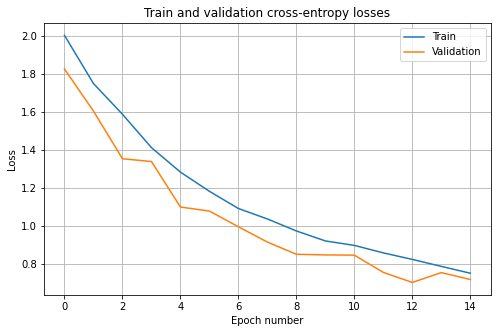

In [11]:
learning.plot_losses(train_losses=train_losses, valid_losses=valid_losses,
            fig_size_width=8, fig_size_height=5)

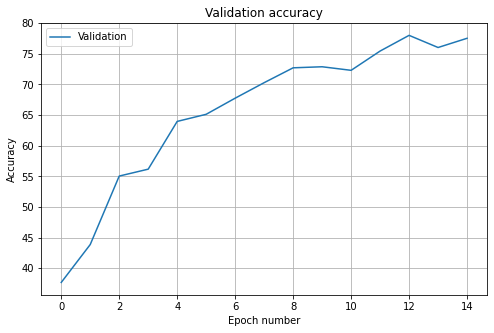

In [12]:
learning.plot_accuracy(validation_accuracy=validation_accuracy,
              fig_size_width=8, fig_size_height=5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Labels: church


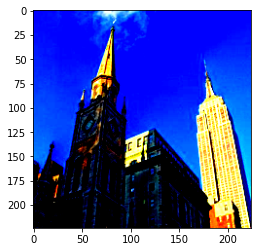

In [13]:
learning.predict_image(test_dataset[200][0])